In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.820 s
Magnetic Energy 2429.6860752467796
zb, ib: 553.14 ohm 137.78 A
SCI: 14.54 [%]
Bax  [HV] = 137.54 [mT]
Brad [HV] = 45.38 [mT]
Bax  [LV] = 130.6 [mT]
Brad [Lv] = 61.88 [mT]


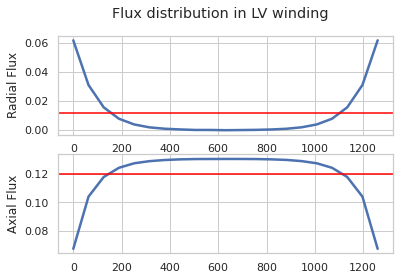

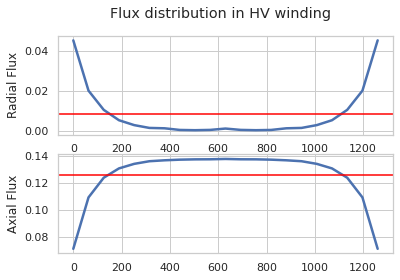

In [2]:
from importlib_resources import files
from src.two_winding_model import TransformerDesign, TwoWindingModel

path = files("data").joinpath("31_5_MVA_example.json")

import json

with open(path) as json_file:
    data = json.load(json_file)

transformer = TransformerDesign.from_dict(data)

trafo_model = TwoWindingModel(input=transformer)
trafo_model.calculate(is_sc=False)

# FEM calculation
trafo_model.fem_simulation()

In [3]:
print(trafo_model.results)

MainResults(wh=1560.0, feasible=True, core_loss=15.3, load_loss=96.63915778911488, copper_mass=0.0, sci=14.49, window_width=293.1, core_mass=17256.1, turn_voltage=76.11, capitalized_cost=0.0, fem_based_sci=14.539207475285146, fem_bax_hv=0.13754287530741072, fem_brad_hv=0.04538323823550172, fem_bax_brad_hv=0.0, fem_bax_lv=0.13059801586762299, fem_brad_lv=0.06187766472267242, fem_bax_brad_lv=0.0)


In [4]:
print(trafo_model.hv_winding)


WindingDesign(inner_radius=424.6, thickness=98.5, winding_height=1260.0, filling_factor=57.0, current_density=1.95, mass=5623.6, dc_loss=51.7, ac_loss=4.2727474664718725, outer_radius=523.1, cable_length=0.0, amper_turns=137948.3)


In [5]:
print(trafo_model.lv_winding)

WindingDesign(inner_radius=303.0, thickness=71.6, winding_height=1260.0, filling_factor=76.5, current_density=2.0, mass=3922.6, dc_loss=38.0, ac_loss=2.6664103226429976, outer_radius=374.6, cable_length=0.0, amper_turns=138030.5)
